# Developer/Programmer Jobs Ads Analysis
    
This data set was built using job ads from indeed.com, generated as a response to the general queries "programmer" and "developer". 

In [1]:
import pandas as pd

In [2]:
scraped_job_data = pd.read_json("/Users/aaron/indeed/indeed/spiders/more.json")

In [3]:
scraped_job_data.head()

,title,job_details,qualifications,benefits,full_job_description
0,Python Developer,"[Job details, Salary, $80,000 - $120,000 a yea...","[Qualifications, Bachelor's (Preferred), REST:...",[],"[Write effective, scalable code, Develop back-..."
1,Associate Developer (Remote),[],[],[],"[Nationwide/Remote, \n, Associate Developer at..."
2,C# Developer,[],[],[],"[Pricing Developer, \nWhippany, NJ, \n, As a B..."
3,Web Developer,"[Job details, Job Type, Full-time]",[],[],"[Position Responsibilities:, Qualifications:, ..."
4,Jr. Software Developer,"[Job details, Salary, $65,000 - $90,000 a year...","[Qualifications, Bachelor's (Preferred), Node....",[],"[Job Title: Jr. Software Developer, Location: ..."


In [4]:
scraped_job_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3655 entries, 0 to 3654
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   title                 3648 non-null   object
 1   job_details           3655 non-null   object
 2   qualifications        3655 non-null   object
 3   benefits              3655 non-null   object
 4   full_job_description  3655 non-null   object
dtypes: object(5)
memory usage: 142.9+ KB


### Check for empty values in columns
    astype(bool) will filter out empty rows. 

In [5]:
len(scraped_job_data[scraped_job_data.job_details.astype(bool)])

2950

In [6]:
len(scraped_job_data[scraped_job_data.qualifications.astype(bool)])

1190

In [7]:
(scraped_job_data[scraped_job_data.full_job_description.astype(bool)])

,title,job_details,qualifications,benefits,full_job_description
0,Python Developer,"[Job details, Salary, $80,000 - $120,000 a yea...","[Qualifications, Bachelor's (Preferred), REST:...",[],"[Write effective, scalable code, Develop back-..."
1,Associate Developer (Remote),[],[],[],"[Nationwide/Remote, \n, Associate Developer at..."
2,C# Developer,[],[],[],"[Pricing Developer, \nWhippany, NJ, \n, As a B..."
3,Web Developer,"[Job details, Job Type, Full-time]",[],[],"[Position Responsibilities:, Qualifications:, ..."
4,Jr. Software Developer,"[Job details, Salary, $65,000 - $90,000 a year...","[Qualifications, Bachelor's (Preferred), Node....",[],"[Job Title: Jr. Software Developer, Location: ..."
...,...,...,...,...,...
3650,Core Developer,"[Job details, Job Type, Full-time]",[],[],[What does a great TradeFlow Core Developer do...
3651,SDET - C# - Fully Remote,"[Job details, Salary, $125,000 - $160,000 a year]",[],[],"[Our client, a software company in the healthc..."
3652,C# Developer (7+ years experience),"[Job details, Salary, $80,000 - $150,000 a yea...","[Qualifications, Bachelor's (Required), C# or ...",[],[NOVO Engineering is a contract engineering se...
3653,PHP / CodeIgnitor Developer,"[Job details, Job Type, Full-time]",[],[],"[Description:\n, \nLynker Technologies has an ..."


In [8]:
len(scraped_job_data[scraped_job_data.title.astype(bool)])

3648

In [9]:
len(scraped_job_data[scraped_job_data.benefits.astype(bool)])

0

### Drop empty benefits column and rows without full description

In [10]:
scraped_job_data.drop('benefits', axis=1, inplace=True)

In [11]:
job_data = scraped_job_data[scraped_job_data.full_job_description.astype(bool)].copy()

In [12]:
len(job_data)

3622

### Join lists in last three columns to be able to check for and drop duplicates
    pandas duplicated() cannot work with lists

In [13]:
for col in job_data.columns[1:]:
    job_data.loc[:,col] = job_data[col].apply(lambda x: " ".join(x))




In [14]:
job_data.head()

,title,job_details,qualifications,full_job_description
0,Python Developer,"Job details Salary $80,000 - $120,000 a year J...",Qualifications Bachelor's (Preferred) REST: 1 ...,"Write effective, scalable code Develop back-en..."
1,Associate Developer (Remote),,,Nationwide/Remote \n Associate Developer at Be...
2,C# Developer,,,"Pricing Developer \nWhippany, NJ \n As a Barcl..."
3,Web Developer,Job details Job Type Full-time,,Position Responsibilities: Qualifications: Pre...
4,Jr. Software Developer,"Job details Salary $65,000 - $90,000 a year Jo...",Qualifications Bachelor's (Preferred) Node.js:...,Job Title: Jr. Software Developer Location: Pa...


In [15]:
job_data.duplicated().sum()

1497

In [16]:
job_data[job_data.duplicated() == True]

,title,job_details,qualifications,full_job_description
36,"Java Developer (100% Remote, $85/hr)",Job details Salary From $85 an hour Job Type F...,Qualifications Java: 4 years (Required) Bachel...,BNL Consulting is actively seeking a Java Deve...
38,Customer Success Engineer for Enterprise SaaS,"Job details Salary From $100,000 a year Job Ty...",Qualifications Bachelor's (Preferred),Location : Work From Your Home on a Remote-Fir...
219,Remote C# Software Developer,Job details Job Type Full-time,,Overview:\n \nDo you have a passion for doing ...
293,Remote C# Software Developer,Job details Job Type Full-time,,Overview:\n \nDo you have a passion for doing ...
296,Remote C# Software Developer,Job details Job Type Full-time,,Overview:\n \nDo you have a passion for doing ...
...,...,...,...,...
3645,Lead Software Developer,"Job details Salary $67,600 - $190,100 a year",,The Team: The Impact: What’s in it for you: Co...
3648,Front End Developer,"Job details Salary $90,000 - $130,000 a year J...",,Are you the type of person who loves finding s...
3650,Core Developer,Job details Job Type Full-time,,What does a great TradeFlow Core Developer do?...
3651,SDET - C# - Fully Remote,"Job details Salary $125,000 - $160,000 a year",,"Our client, a software company in the healthca..."


In [17]:
job_data[job_data == job_data.iloc[36]].dropna()

,title,job_details,qualifications,full_job_description
22,"Java Developer (100% Remote, $85/hr)",Job details Salary From $85 an hour Job Type F...,Qualifications Java: 4 years (Required) Bachel...,BNL Consulting is actively seeking a Java Deve...
36,"Java Developer (100% Remote, $85/hr)",Job details Salary From $85 an hour Job Type F...,Qualifications Java: 4 years (Required) Bachel...,BNL Consulting is actively seeking a Java Deve...


In [18]:
job_data[job_data == job_data.iloc[38]].dropna()

,title,job_details,qualifications,full_job_description
26,Customer Success Engineer for Enterprise SaaS,"Job details Salary From $100,000 a year Job Ty...",Qualifications Bachelor's (Preferred),Location : Work From Your Home on a Remote-Fir...
38,Customer Success Engineer for Enterprise SaaS,"Job details Salary From $100,000 a year Job Ty...",Qualifications Bachelor's (Preferred),Location : Work From Your Home on a Remote-Fir...
760,Customer Success Engineer for Enterprise SaaS,"Job details Salary From $100,000 a year Job Ty...",Qualifications Bachelor's (Preferred),Location : Work From Your Home on a Remote-Fir...
790,Customer Success Engineer for Enterprise SaaS,"Job details Salary From $100,000 a year Job Ty...",Qualifications Bachelor's (Preferred),Location : Work From Your Home on a Remote-Fir...
1968,Customer Success Engineer for Enterprise SaaS,"Job details Salary From $100,000 a year Job Ty...",Qualifications Bachelor's (Preferred),Location : Work From Your Home on a Remote-Fir...


In [19]:
job_data[job_data == job_data.iloc[1790]].dropna()

,title,job_details,qualifications,full_job_description
2,C# Developer,,,"Pricing Developer \nWhippany, NJ \n As a Barcl..."
1680,C# Developer,,,"Pricing Developer \nWhippany, NJ \n As a Barcl..."
1805,C# Developer,,,"Pricing Developer \nWhippany, NJ \n As a Barcl..."
2852,C# Developer,,,"Pricing Developer \nWhippany, NJ \n As a Barcl..."


In [20]:
job_data.drop_duplicates(inplace=True)

In [22]:
len(job_data)

2125

### Use spacy's built-in named entity recognizer as to generate ideas about domain specific entites

In [23]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [24]:
docs = list(nlp.pipe(job_data.full_job_description))

In [25]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text+' - ' + ent.label_+ ' - '+str(spacy.explain(ent.label_)))
    else:
        print("No named entities found.")

In [26]:
show_ents(docs[0])

Develop - PERSON - People, including fictional
Improve - PRODUCT - Objects, vehicles, foods, etc. (not services)
Assess - ORG - Companies, agencies, institutions, etc.
Requirements Work - ORG - Companies, agencies, institutions, etc.
at least one - CARDINAL - Numerals that do not fall under another type
Django, Flask or Pyramid) Knowledge of - WORK_OF_ART - Titles of books, songs, etc.
Computer Science - ORG - Companies, agencies, institutions, etc.
Job Type: Full - PERSON - People, including fictional
80,000.00 - MONEY - Monetary values, including unit
120,000.00 - MONEY - Monetary values, including unit
Dental - ORG - Companies, agencies, institutions, etc.
Vision - ORG - Companies, agencies, institutions, etc.
Schedule - ORG - Companies, agencies, institutions, etc.
8 hour - TIME - Times smaller than a day
Bachelor - ORG - Companies, agencies, institutions, etc.
1 year - DATE - Absolute or relative dates or periods
1 year - DATE - Absolute or relative dates or periods


In [27]:
show_ents(docs[358])

WASHINGTON - GPE - Countries, cities, states
DC - GPE - Countries, cities, states
SAN ANTONIO - GPE - Countries, cities, states
TX - ORG - Companies, agencies, institutions, etc.
MIAMI - ORG - Companies, agencies, institutions, etc.
Computer Science, Information Systems - ORG - Companies, agencies, institutions, etc.
ServiceNow - ORG - Companies, agencies, institutions, etc.
Equal Employment Opportunity - WORK_OF_ART - Titles of books, songs, etc.
iTech AG - PRODUCT - Objects, vehicles, foods, etc. (not services)


In [28]:
def get_ents(doc):
    if doc.ents:
        return [ent.text for ent in doc.ents]
    else:
        pass

In [29]:
from pandas.core.common import flatten

In [30]:
ents = pd.Series(list(flatten([get_ents(doc) for doc in docs])))

In [31]:
ent_counts = ents.value_counts(ascending=False)

In [32]:
ent_counts

JavaScript             811
1 year                 626
Bachelor               538
SQL                    527
Schedule               488
                      ... 
WinForms/WPF 4           1
Windows Installer        1
ActionController         1
Resque                   1
Lynker Technologies      1
Length: 16307, dtype: int64

In [33]:
ent_counts.head(50)

JavaScript           811
1 year               626
Bachelor             538
SQL                  527
Schedule             488
CSS                  474
8 hour               472
Java                 428
Monday               404
one                  388
5 years              376
Friday               367
3 years              334
One                  321
Computer Science     316
US                   314
Dental               309
#                    285
PHP                  283
Microsoft            274
2 years              267
IBM                  255
5+ years             237
Git                  234
Vision               226
3+ years             216
API                  209
UI                   208
100%                 192
U.S.                 181
4 years              167
the United States    167
2+ years             165
WordPress            161
third                156
C++                  154
CI                   152
HTML5                147
2                    145
first                145


### Check performance of spacy ner
    Search for "Python" and "JavaScript" using spacy ner and simple string search with regex IGNORECASE

In [34]:
ent_counts[ent_counts.index == "Python"]

Python    82
dtype: int64

In [35]:
import re

In [36]:
python_spacy_check = job_data.full_job_description.str.findall('Python', flags=re.IGNORECASE)

In [37]:
python_spacy_check[python_spacy_check.values.astype(bool)]

0               [Python, Python]
1                       [Python]
10              [Python, Python]
11                      [Python]
18      [Python, Python, Python]
                  ...           
3617    [Python, Python, Python]
3627            [Python, Python]
3632                    [Python]
3635                    [Python]
3652                    [Python]
Name: full_job_description, Length: 400, dtype: object

In [38]:
javascript_spacy_check = job_data.full_job_description.str.findall('JavaScript', flags=re.IGNORECASE)

In [39]:
javascript_spacy_check[javascript_spacy_check.values.astype(bool)]

4                                [Javascript, Javascript]
6                                            [Javascript]
8                                            [JavaScript]
9                                            [JavaScript]
17                                           [Javascript]
                              ...                        
3635                                         [JavaScript]
3640                 [javascript, Javascript, javascript]
3641    [JavaScript, JavaScript, JavaScript, JavaScrip...
3644                                         [JavaScript]
3653                                         [Javascript]
Name: full_job_description, Length: 803, dtype: object

    Spacy ner seems to find "JavaScript" roughly the correct amount of times.
    But it substantially undercounts "Python": 40 vs. 244

### Build a rules-based gazateer for a job ad specific named-entity recognizer

In [40]:
def count_skills(skill_title, pattern=None, flags=re.IGNORECASE):
    if not pattern:
        pattern = skill_title
    try:
        skill_series = job_data.full_job_description.str.findall(pattern, flags)
        count = len(skill_series[skill_series.values.astype(bool)])
        skill_count = {'Skill' : skill_title, 'Count' : count}
    except:
        pass
    else:
        return skill_count

In [41]:
count_skills("Python")

{'Skill': 'Python', 'Count': 400}

In [42]:
patterns = ['Python', "SQL", 'JavaScript', 'Java', 'AWS', 'Linux', 'Agile', 'Django', 'DevOps', 'Cloud',
           'CSS', 'Docker', 'Git', 'ETL', 'GIS', 'Tableau',
           'Kubernetes', "Cloud", 'Azure', 'Jenkins', 'Ruby', 'HTML5', 
            "Excel", "NoSQL", "Perl", "Hadoop", "Angular", "Lambda", "Oracle",
           'Redis', 'JIRA', 'Flask', 'JSON', 'PostgreSQL', 'Kafka', 'Terraform', 
            'Salesforce', 'XML', 'Scrum', 'Scala', 'Spark', 'NodeJS', 
            'Bash', 'JIRA', 'React', 'AngularJS' , "PowerShell", "HTML", 
            'Golang', 'GitHub', 'Visual Studio', 'jQuery', 'Bitbucket', "salesforce.com", 'Splunk', 
            'Machine Learning', 'Big Data', 'MySQL', 'DynamoDB', 'PowerPoint',
            'Selenium', 'Bootstrap', 'Power BI', 'GitLab', 'Redshift', 'Google Cloud', 'HTTP', 
            'Redfin', 'TCP/IP', 'Mongo', "WordPress", "MVC"]

In [43]:
skill_counts = [count_skills(pattern) for pattern in patterns]

In [44]:
skill_counts

[{'Skill': 'Python', 'Count': 400},
 {'Skill': 'SQL', 'Count': 900},
 {'Skill': 'JavaScript', 'Count': 803},
 {'Skill': 'Java', 'Count': 1155},
 {'Skill': 'AWS', 'Count': 397},
 {'Skill': 'Linux', 'Count': 205},
 {'Skill': 'Agile', 'Count': 610},
 {'Skill': 'Django', 'Count': 45},
 {'Skill': 'DevOps', 'Count': 198},
 {'Skill': 'Cloud', 'Count': 457},
 {'Skill': 'CSS', 'Count': 598},
 {'Skill': 'Docker', 'Count': 127},
 {'Skill': 'Git', 'Count': 678},
 {'Skill': 'ETL', 'Count': 66},
 {'Skill': 'GIS', 'Count': 130},
 {'Skill': 'Tableau', 'Count': 30},
 {'Skill': 'Kubernetes', 'Count': 78},
 {'Skill': 'Cloud', 'Count': 457},
 {'Skill': 'Azure', 'Count': 202},
 {'Skill': 'Jenkins', 'Count': 102},
 {'Skill': 'Ruby', 'Count': 59},
 {'Skill': 'HTML5', 'Count': 194},
 {'Skill': 'Excel', 'Count': 715},
 {'Skill': 'NoSQL', 'Count': 95},
 {'Skill': 'Perl', 'Count': 72},
 {'Skill': 'Hadoop', 'Count': 24},
 {'Skill': 'Angular', 'Count': 333},
 {'Skill': 'Lambda', 'Count': 36},
 {'Skill': 'Oracle', 

In [45]:
skill_counts_frame = pd.Series({skill_count['Skill']: skill_count['Count'] for skill_count in skill_counts })

In [46]:
skill_counts_frame.sort_values(ascending=False, inplace=True)

<AxesSubplot:>

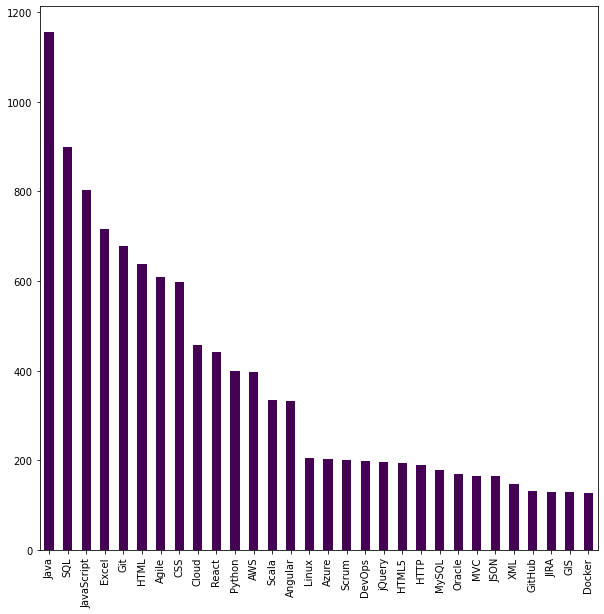

In [56]:
skill_counts_frame[:30].plot(kind="bar", figsize=(10,10))

In [49]:
job_data[job_data.job_details.str.findall("Salary").astype(bool)]

,title,job_details,qualifications,full_job_description
0,Python Developer,"Job details Salary $80,000 - $120,000 a year J...",Qualifications Bachelor's (Preferred) REST: 1 ...,"Write effective, scalable code Develop back-en..."
4,Jr. Software Developer,"Job details Salary $65,000 - $90,000 a year Jo...",Qualifications Bachelor's (Preferred) Node.js:...,Job Title: Jr. Software Developer Location: Pa...
8,Junior Web Developer,"Job details Salary Up to $122,674 a year Job T...",,Cannabis Creative Group is an award-winning di...
10,C++ Developer,Job details Salary $45 - $50 an hour Job Type ...,Qualifications US work authorization (Required...,"· Having development experience in C / C++, Po..."
12,Entry Level Java Developer,Job details Salary $35 an hour Job Type Full-time,,What We Are Looking For \n \n Computer Science...
...,...,...,...,...
3624,Web Developer,Job details Salary $25 - $59 an hour Job Type ...,Qualifications High school or equivalent (Pref...,We are looking for an outstanding Web Develope...
3632,Junior Developer,"Job details Salary $80,000 - $105,000 a year J...","Qualifications Bachelor's (Preferred) Perl, PH...",WHAT WE WANT FriendFinder Networks is looking ...
3646,Senior Java/J2EE Developer,Job details Salary $65 - $75 an hour Job Type ...,,Location : Remote - In and around USA Hire Typ...
3647,UI/UX Developer (100% REMOTE),Job details Salary $75 - $80 an hour Job Type ...,Qualifications High school or equivalent (Pref...,Positions Needed: 3 Max Submits: 9 Term: 6 mon...


In [50]:
job_data[job_data.full_job_description.str.findall("\$").astype(bool)]

,title,job_details,qualifications,full_job_description
0,Python Developer,"Job details Salary $80,000 - $120,000 a year J...",Qualifications Bachelor's (Preferred) REST: 1 ...,"Write effective, scalable code Develop back-en..."
4,Jr. Software Developer,"Job details Salary $65,000 - $90,000 a year Jo...",Qualifications Bachelor's (Preferred) Node.js:...,Job Title: Jr. Software Developer Location: Pa...
8,Junior Web Developer,"Job details Salary Up to $122,674 a year Job T...",,Cannabis Creative Group is an award-winning di...
10,C++ Developer,Job details Salary $45 - $50 an hour Job Type ...,Qualifications US work authorization (Required...,"· Having development experience in C / C++, Po..."
13,Software Developer,"Job details Salary $117,021 a year Job Type Fu...",,Job Description\n Software Developers : Analyz...
...,...,...,...,...
3632,Junior Developer,"Job details Salary $80,000 - $105,000 a year J...","Qualifications Bachelor's (Preferred) Perl, PH...",WHAT WE WANT FriendFinder Networks is looking ...
3642,Software Engineering Mentor (Part-time),Job details Job Type Part-time,,What is Pathrise? \nPathrise (YC W18) is a sta...
3646,Senior Java/J2EE Developer,Job details Salary $65 - $75 an hour Job Type ...,,Location : Remote - In and around USA Hire Typ...
3647,UI/UX Developer (100% REMOTE),Job details Salary $75 - $80 an hour Job Type ...,Qualifications High school or equivalent (Pref...,Positions Needed: 3 Max Submits: 9 Term: 6 mon...


In [76]:
pattern = r"(?:.*Salary\s)(?P<salary>.*)(?:Job\sType.*)"

salary = job_data.job_details.str.extract(pattern).dropna()

In [77]:
pd.merge(job_data, salary, how="inner", right_index=True, left_index=True )

,title,job_details,qualifications,full_job_description,salary
0,Python Developer,"Job details Salary $80,000 - $120,000 a year J...",Qualifications Bachelor's (Preferred) REST: 1 ...,"Write effective, scalable code Develop back-en...","$80,000 - $120,000 a year"
4,Jr. Software Developer,"Job details Salary $65,000 - $90,000 a year Jo...",Qualifications Bachelor's (Preferred) Node.js:...,Job Title: Jr. Software Developer Location: Pa...,"$65,000 - $90,000 a year"
8,Junior Web Developer,"Job details Salary Up to $122,674 a year Job T...",,Cannabis Creative Group is an award-winning di...,"Up to $122,674 a year"
10,C++ Developer,Job details Salary $45 - $50 an hour Job Type ...,Qualifications US work authorization (Required...,"· Having development experience in C / C++, Po...",$45 - $50 an hour
12,Entry Level Java Developer,Job details Salary $35 an hour Job Type Full-time,,What We Are Looking For \n \n Computer Science...,$35 an hour
...,...,...,...,...,...
3624,Web Developer,Job details Salary $25 - $59 an hour Job Type ...,Qualifications High school or equivalent (Pref...,We are looking for an outstanding Web Develope...,$25 - $59 an hour
3632,Junior Developer,"Job details Salary $80,000 - $105,000 a year J...","Qualifications Bachelor's (Preferred) Perl, PH...",WHAT WE WANT FriendFinder Networks is looking ...,"$80,000 - $105,000 a year"
3646,Senior Java/J2EE Developer,Job details Salary $65 - $75 an hour Job Type ...,,Location : Remote - In and around USA Hire Typ...,$65 - $75 an hour
3647,UI/UX Developer (100% REMOTE),Job details Salary $75 - $80 an hour Job Type ...,Qualifications High school or equivalent (Pref...,Positions Needed: 3 Max Submits: 9 Term: 6 mon...,$75 - $80 an hour
